# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
print("the dataset has {} instances and {} attributes" .format(auto_numeric.shape[0], auto_numeric.shape[1]))

the dataset has 159 instances and 16 attributes


In [3]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


In [4]:
auto_numeric.head()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


(2) ***Your answer goes here:***

The dataset consists of 16 attributes and has 159 instances. All of the attributes are continuous variables.

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

*********************** correlation coefficients between each attribute and price ***********************

normalized-losses          0.015368
wheel-base                 0.423511
length                     0.512883
width                      0.524326
height                     0.139563
engine-size                0.715125
bore                       0.365207
stroke                     0.127834
compression-ratio          0.125683
engine-power               0.443969
peak-rpm                  -0.099345
city-mpg                  -0.356790
highway-mpg               -0.438467
mean-effective-pressure   -0.104860
torque                     0.101435
price                      1.000000
Name: price, dtype: float64
****************************** distribution of each attribute with 'price' ******************************



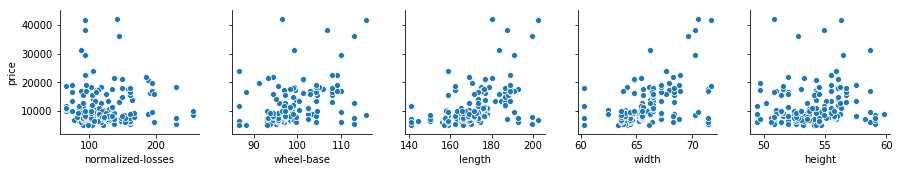

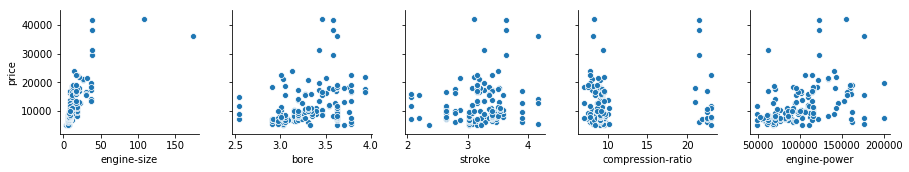

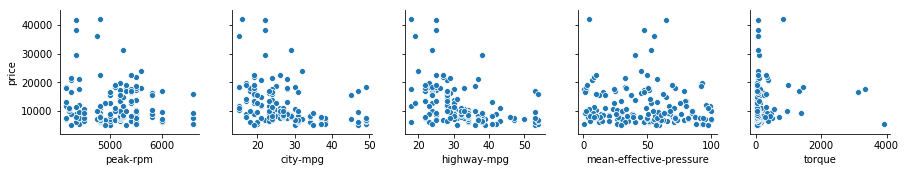

In [5]:
# (1) # Your Code goes here:

# print correlation coefficients
print("*********************** correlation coefficients between each attribute and price ***********************\n")
print(auto_numeric.corr().loc[:,'price'])

# plot distribution between attributes and 'price'
print("****************************** distribution of each attribute with 'price' ******************************\n")
col = auto_numeric.columns[:-1]
for i in np.arange(0,15,5):
    sns.pairplot(data=auto_numeric, x_vars=col[i:i+5], y_vars = 'price')

(2) ***Your answer goes here:***

The attributes 'engine-size', 'width', 'length' and 'engine-power' have a positive correlation with price and 'highway-mpg' has a negative correlation with price. Hence this are the most usefull for predicting 'price'. Whereupon 'engine-size' seems to be the single most usefull attribute.
I personally find that the use of both tools simultainesly the most benificial. The plots show the distibution and hence the noise, but with the correlation coefficient it is easier to rank the attributes for usefullness.

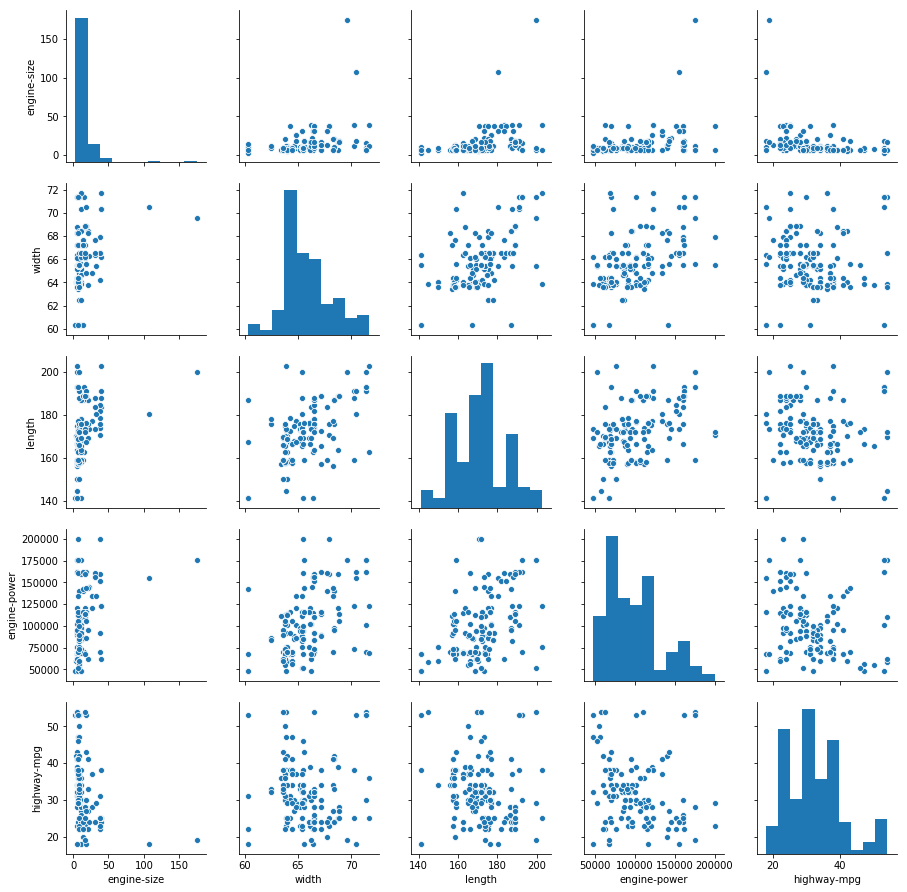

In [6]:
# (3) # Your Code goes here:

ax = sns.pairplot(data=auto_numeric[['engine-size', 'width', 'length', 'engine-power', 'highway-mpg']])

(4) #STARTHIDE#

[2 Marks] Identify at least 2 pairs which appear correlated. Some examples are: 
  * `length` and `wheel base`
  * `width` and `wheel-base`
  * `engine-power` and `length`
  
  other correlated attributes are:
  * 'length' and 'width'
  * 'engine-power and 'width'

(5) ***Your answer goes here:***

I would remove the attributes, 'normalized-losses', 'height', 'stroke', 'compression-ratio', 'peak-rpm', 'mean-effective-pressure', 'torque'.
Since this attributes are not correlated with 'price', they are not contributing for the prediction of 'price'. I would in addition remove one, of the correlated attribute pairs (from 4), like length' or 'width'.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

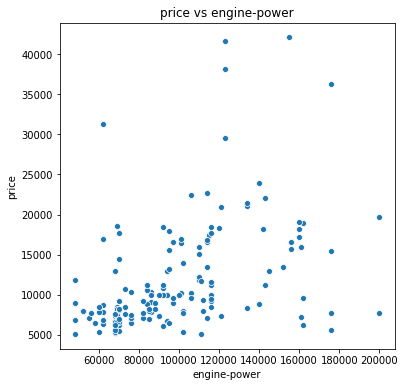

In [7]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='engine-power', y='price', data=auto_numeric)
plt.title("price vs engine-power")
plt.show()

(2) ***Your answer goes here:***

It seems fairly resonable to use 'engine-power' to predict the 'price' to some extent, because there is a weak positive correlation between those two attributes. However, there are a lot of outliers in the data, thus the learnd prediction model wont be very accurate. The outliers are predomiatly in the region grater then 120000 units of 'engine-power' and greater than 20000 units of 'price'. To make the prediction model more accurate it is advisible to use additional attributes.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

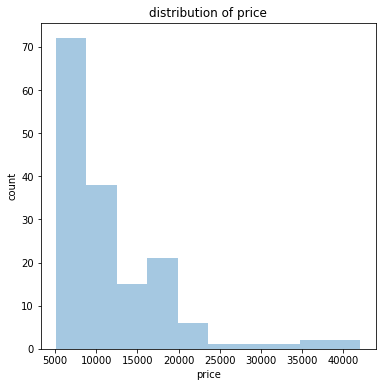

In [8]:
plt.figure(figsize=(6,6))
ax = sns.distplot(auto_numeric['price'], kde=False, bins=10)
plt.ylabel('count')
plt.title("distribution of price")
plt.show()

(2) ***Your answer goes here:***

As mentioned in the last question the data has a lot of outliers that will corrupt the prediction model, because linear regression is susceptible to outliers.
One possibility is to remove the most severe outliers, an other possibility is to transform the data with a function. I would try out, what works best for the data.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [9]:
# Your Code goes here:
X = auto_numeric['engine-power'].values
y = auto_numeric['price'].values

X = X.reshape(X.shape[0],1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print("Shape of X_train: {}    Shape of y_train: {}" .format(X_train.shape, y_train.shape))
print("Shape of X_test: {}    Shape of y_test: {}" .format(X_test.shape, y_test.shape))

Shape of X_train: (127, 1)    Shape of y_train: (127,)
Shape of X_test: (32, 1)    Shape of y_test: (32,)


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [10]:
# Your Code goes here:
baseline = np.average(y_train)

print("baseline (average of y_train): {:.3f}" .format(baseline))

baseline (average of y_train): 11853.268


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [11]:
# (1) # Your Code goes here:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("price = engine-power * {:.3f} + {:.3f}".format(lr.coef_[0],lr.intercept_))

price = engine-power * 0.090 + 2823.122


(2) ***Your answer goes here:***

The result just states that, if the 'engine-power' goes up, the 'price' also goes up. However it is not possible to tell how much infuence the 'engine-power' attribute has on the prediction of the price, since the parameters are dependend on the units of the atributes. For example kWh or MWh.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

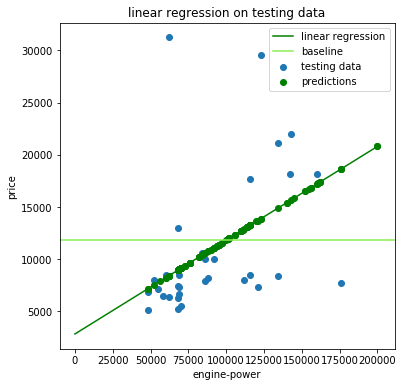

In [12]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
plt.scatter(X_test, y_test, label='testing data')
plt.scatter(X_train, lr.predict(X_train), color='green', label='predictions')
X_plot = np.linspace(0,200000,100)
plt.plot(X_plot, X_plot * lr.coef_[0] + lr.intercept_, color='green', label='linear regression')
plt.axhline(y=np.average(y_train), color='#88ef55', linestyle='-', label='baseline')
plt.legend()
plt.title("linear regression on testing data")
plt.ylabel("price")
plt.xlabel("engine-power")
plt.show()

(2) ***Your answer goes here:***

From just looking at the plot it is hard to tell witch of the models is performing better, due to the high amount of outliers. Although the prediction of the liner regression is far from perfect it seems fitting the data a bit better than the baseline model. To get certainty about witch model performs better, it is indispensable to computer other metrics.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

/Users/philipp/Python/anaconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


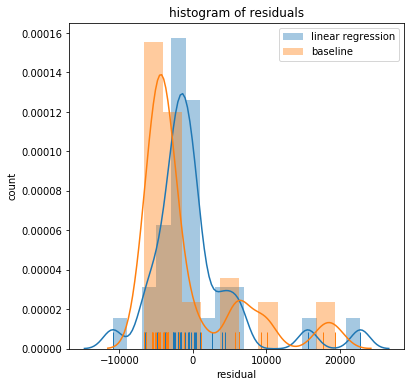

In [13]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
# linear regression
g = sns.distplot(y_test-lr.predict(X_test), rug=True, label='linear regression')
# baseline
g = sns.distplot(y_test-np.average(y_train), rug=True, label='baseline')
# plot
plt.title("histogram of residuals")
plt.xlabel("residual")
plt.ylabel("count")
plt.legend()
plt.show()

In [14]:
# (2) # Your Code goes here:

#linear regression
r2 = r2_score(y_test, lr.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
print("linear regression:")
print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2,rmse))

# baseline
baseline = np.linspace(1,1,len(y_test)) * np.average(y_train)
r2 = r2_score(y_test, baseline)
rmse = np.sqrt(mean_squared_error(y_test, baseline))
print("baseline:")
print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2, rmse))

linear regression:
Coefficient of Determination (R^2): 0.169   Root Mean Squared Error (RMSE): 6153.704
baseline:
Coefficient of Determination (R^2): -0.015   Root Mean Squared Error (RMSE): 6800.331


(3) ***Your answer goes here:***

It looks like the the residuals of the linear regression model are gaussian distributed with a almost symetrical distribution. The residuals of the basline model seem to be positivley skewed.

The R^2 is a relative measure, because it shows the relative inprovement of the linear regression model to the average model. Therefore its range streches from 0 to 1. The higher R^2 of the linear regression model is the proportionaly better it predicts the outcome compared to the average. This indicates that our linear regression model (0.169) does a bit better than the baseline model (-0.015). Since in our case the baseline model is the average of the training data, the R^2 for the baseline should be around 0 (In our case the R^2 of the baseline model is not exactly 0. This is because of the difference between the average of the training and the avereage of the test set). 

The RMSE is the square root of the variance of the residuals, hence shows the difference between the observed data and the models predicted data. It is in contrast to R^2 a absolute measure and the lower the RMSE is the better the fit of the model. In our case the RMSE of the linear regression model (6153.704) is lower than the RMSE of the baseline model (6800.331), that together with the higher R^2 indicates that the the linear regression model is performing slightly better than the baseline model.


<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

In the above results the data is splitted into a training and a test set. In doing so we withhold a part of the dataset for training and we are evaluating just on one part of the dataset, that is not used for training.

In [15]:
# (2) # Your Code goes here:
kf5 = KFold(n_splits=5, shuffle=True, random_state=0)
i = 1
for train_index, test_index in kf5.split(auto_numeric):
    print("*******************************  fold {}  *******************************".format(i))
    print("train:")
    print(train_index)
    print("test:")
    print(test_index)
    print("\n")
    i += 1 

*******************************  fold 1  *******************************
train:
[  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
test:
[  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]


*******************************  fold 2  *******************************
train:
[  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  

In [16]:
# (3) # Your Code goes here:
lr_crossval = LinearRegression()
y_crossval = cross_val_predict(lr_crossval, X, y, cv=kf5)
print("The shape of predicted is {} and the shape of y is {}.\n".format(y_crossval.shape,y.shape))

r2 = r2_score(y, y_crossval)
rmse = np.sqrt(mean_squared_error(y, y_crossval))
print("linear regression with cross-validation:")
print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2, rmse))

The shape of predicted is (159,) and the shape of y is (159,).

linear regression with cross-validation:
Coefficient of Determination (R^2): 0.173   Root Mean Squared Error (RMSE): 6114.452


(4) ***Your answer goes here:***

In cross-validation evrey data point is used both for training and testing. The R^2 of the newly trained 5-fold cross-validation linerar regression model is a bit higher (0.173) and the RMSE (6114.452) is marginally lower compared to the previous model with a fixed training and testing set. By using 5-fold cross-validation the model improverd slighty.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [17]:
# (1) # Your Code goes here:

# load dataset
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')

# make independent variable and dependent variable
X_base = auto_base['engine-power'].values
y_base = auto_base['price'].values
X_base = X_base.reshape(X.shape[0],1)

# split dataset into training set and test set
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, train_size=0.8, test_size=0.2, random_state=0)

# train linear regression model
lr_base = LinearRegression()
lr_base.fit(X_base_train, y_base_train)

# get R^2 and RMSE
r2 = r2_score(y_base_test, lr_base.predict(X_base_test))
rmse = np.sqrt(mean_squared_error(y_base_test, lr_base.predict(X_base_test)))

print('Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}'.format(r2, rmse))

Coefficient of Determination (R^2): -0.015   Root Mean Squared Error (RMSE): 6800.331


       engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000


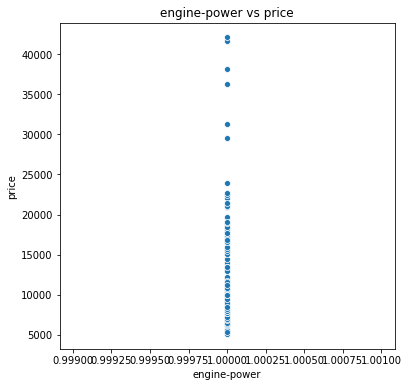

average of y(predicted variable) in the training set:
11853.268

linear regression parameters:
price = engine-power * 0.000 + 11853.268


In [18]:
# (2) Show any working code here...
# Your Code goes here:

# describe data
print(auto_base.describe())

# plot scatterplot engine-power vs price
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='engine-power', y='price', data=auto_base)
plt.title("engine-power vs price")
plt.show()

# calculate average of the training data
print("average of y(predicted variable) in the training set:")
print("{:.3f}\n".format(np.average(y_base_train)))

# print linear regression parameters
print("linear regression parameters:")
print("price = engine-power * {:.3f} + {:.3f}".format(lr_base.coef_[0],lr_base.intercept_))

(2) - Final Conclusion(s)
***Your answer goes here:***


The 'engine-power' attrbute in the new dataset contains just the value 1. The first parameter of the learnd linear regression model is 0, hence the predicted 'price' is not dependend on the attribute 'engine-power'. The second parameter is exactly the average of the training data, thus this linear regression model is the baseline model and will always predict the the average 'price' 11853.268.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [19]:
# (1) # Your Code goes here:
X = auto_numeric.drop('price', axis=1).values
y = auto_numeric['price'].values

lr_mv = LinearRegression()
y_mv = cross_val_predict(lr_mv, X, y, cv=kf5)

r2 = r2_score(y, y_mv)
rmse = np.sqrt(mean_squared_error(y, y_mv))

print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2, rmse))

Coefficient of Determination (R^2): 0.486   Root Mean Squared Error (RMSE): 4819.805


(2) ***Your answer goes here:***

The Multi-Variate LinearRegression model has a higher R^2 (0.486) and a lower RMSE (4819.805) compared to the univariate linear regression model. This two measures indicate that the model for predicting the 'price' improved significantly, hence we can expect a more accurate prediction of. the 'price' with this new model. The improvement is due to the information gain of the additional attributes.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

Text(0.5,1,'price vs engine-size')

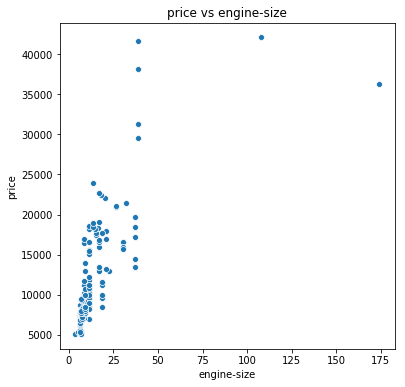

In [20]:
# (1) #STARTHIDE#
plt.figure(figsize=(6,6))
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('price')
ax.set_title('price vs engine-size')

(2) ***Your answer goes here:***

The 'engine-size' attribute has some pretty obvious outliers. And sincs linear regression is prone to outliers, the outliers will change the optimal fit.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

Text(0.5,1,'price vs engine-size with log-transformation')

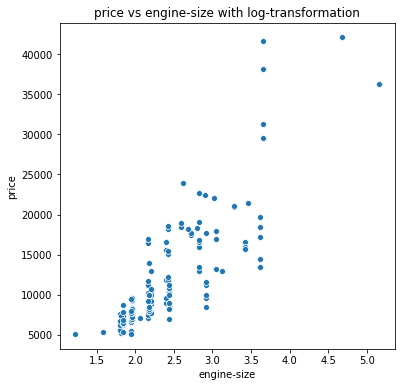

In [21]:
# (1) # Your Code goes here:
plt.figure(figsize=(6,6))
ax = sns.scatterplot(np.log(auto_numeric['engine-size']), auto_numeric['price'])
ax.set_ylabel('price')
ax.set_title('price vs engine-size with log-transformation')

In [22]:
# (2) # Your Code goes here:

# transform engine-size with log
X = auto_numeric.drop('price', axis=1).copy()
X['engine-size'] = np.log(X['engine-size'])
X = X.values

# train linear regression
lr_mv = LinearRegression()
y_mv = cross_val_predict(lr_mv, X, y, cv=kf5)

r2 = r2_score(y, y_mv)
rmse = np.sqrt(mean_squared_error(y, y_mv))

print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2, rmse))

Coefficient of Determination (R^2): 0.690   Root Mean Squared Error (RMSE): 3745.920


***Your answer goes here:***

With the transformation of the 'engine-size' attribute the Multi-Variate LinearRegression model got even better. The R^2 increased a lot and the RMSE decreased sharply.
Since 'engine-size' has the highest correlation coefficient (Question 1.2) from all the attributes, it is clear that it contributes the most to the prediction of the 'price'. By transforming the data points of the 'engine-size' attribute, we could reduce the impact of the the outliers and improve the model a lot.

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

It is not possible to interpret the importance of the attributes through the coefficients, because the attributes have different units. For example the coefficient of an attribute with [km] will be 1000 times larger than with [m]. We can normalize all attributes and thus get all data points into the same range (0 to 1). If all the data is in the same range we can finally use the learned coefficients for evaluating the performance.

In [23]:
# (2) # Your Code goes here:

# min-max normalize data
att_max = np.amax(X, axis=0)
att_min = np.amin(X, axis=0)
att_X = (X-att_min)/(att_max - att_min)

# train linear regression
lr_norm = LinearRegression()
lr_norm.fit(att_X, y)

# print coefficients
print("********************************* min-max normalized data coefficients *********************************\n")
for i, name in enumerate(auto_numeric.columns[:-1]):
    print(name + ": {:.3f}".format(lr_norm.coef_[i]))

********************************* min-max normalized data coefficients *********************************

normalized-losses: -1445.771
wheel-base: 2022.071
length: -191.956
width: 6892.752
height: 1771.383
engine-size: 33073.932
bore: -2053.237
stroke: -4234.908
compression-ratio: 2826.429
engine-power: -2425.451
peak-rpm: 3193.305
city-mpg: 2674.948
highway-mpg: -6140.124
mean-effective-pressure: -1856.125
torque: -792.856


In [24]:
#att_X = (X-X.mean(axis=0))/(X.std(axis=0))

(3) ***Your answer goes here:***

The three most important features are: 'engine-size', 'highway-mpg' and 'width'

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

I would choose the feauters that correspond to the polynomial shape, by plotting the data and examining the plots. To fit the best polynomial order I would just try several polynomial order plot the fitted kurve and choose the best fit.

In [25]:
# (2) # Your Code goes here:

from sklearn.preprocessing import PolynomialFeatures

# load data
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_numeric_nonlinear = pd.read_csv(data_path, delimiter = ',')
print("the dataset has {} instances and {} attributes" .format(auto_numeric_nonlinear.shape[0], auto_numeric_nonlinear.shape[1]))

#  2nd order polynomeal transformation of attributes 'engine-power' and 'length'
poly = PolynomialFeatures(degree=2)
x_engine = auto_numeric_nonlinear['engine-power'].values
x_engine = x_engine.reshape(x_engine.shape[0],1)
x_engine = poly.fit_transform(x_engine)

x_len = auto_numeric_nonlinear['length'].values
x_len = x_len.reshape(x_len.shape[0],1)
x_len = poly.fit_transform(x_len)

# creating input data
# droping attributes 'length', 'engine-power' and label 'price'
X = auto_numeric_nonlinear.drop(['length', 'engine-power', 'price'], axis=1)
# concatonating the transformed attributes
X = np.concatenate((X, x_len, x_engine), axis=1)

# train linear regression
lr_poly = LinearRegression()
lr_poly.fit(X, y)

y_poly = cross_val_predict(lr_poly, X, y, cv=kf5)

r2 = r2_score(y, y_poly)
rmse = np.sqrt(mean_squared_error(y, y_poly))

print("Coefficient of Determination (R^2): {:.3f}   Root Mean Squared Error (RMSE): {:.3f}".format(r2, rmse))

the dataset has 159 instances and 16 attributes
Coefficient of Determination (R^2): 0.681   Root Mean Squared Error (RMSE): 3795.033


(3) ***Your answer goes here:***

The model with the second ploynomial order seems to perform a bit worse than the model from Q3.3.